## Exploration of Effectiveness of Driver Penalties

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [23]:
# Read in the data, should usually work if data folder is in the same directory as the nb is in, but depends where nb is run from
data_dir = os.path.join(os.path.abspath(os.getcwd()), 'data')
penalty_file = 'penalty_file.csv'
order_file = 'order_file.csv'
order_df = pd.read_csv(os.path.join(data_dir, order_file))
penalty_df = pd.read_csv(os.path.join(data_dir, penalty_file))

In [24]:
order_df.head()

,order.id,driver.id,business.type,expected.profit,order.placed.time,delivery.completed.time,cancel.dummy
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,grocery,12.735685,2019-05-04 14:08:33.000 America/Los_Angeles,2019-05-04 14:22:34.000 America/Los_Angeles,0
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,71.802685,2019-05-03 15:26:37.000 America/Los_Angeles,NaN,1
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,8.856685,2019-05-10 19:26:29.000 America/Los_Angeles,2019-05-10 19:44:22.000 America/Los_Angeles,0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,grocery,15.102685,2019-05-10 23:39:07.000 America/Los_Angeles,2019-05-11 00:02:06.000 America/Los_Angeles,0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,grocery,18.063685,2019-05-08 13:52:08.000 America/Los_Angeles,2019-05-08 14:18:35.000 America/Los_Angeles,0


In [25]:
# clean order times
split_times = order_df['order.placed.time'].str.split(pat=r'\s+', expand=True).rename(columns={0:'order.placed.date', 1:'order.placed.time', 2:'timezone'})
order_df['order.placed.time'] = split_times['order.placed.date'] + ' ' + split_times['order.placed.time']
order_df.insert(6, 'timezone', split_times['timezone'])
order_df['order.placed.time'] = pd.to_datetime(order_df['order.placed.time'], format='ISO8601')
order_df.head()

,order.id,driver.id,business.type,expected.profit,order.placed.time,delivery.completed.time,timezone,cancel.dummy
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,grocery,12.735685,2019-05-04 14:08:33,2019-05-04 14:22:34.000 America/Los_Angeles,America/Los_Angeles,0
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,71.802685,2019-05-03 15:26:37,NaN,America/Los_Angeles,1
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,8.856685,2019-05-10 19:26:29,2019-05-10 19:44:22.000 America/Los_Angeles,America/Los_Angeles,0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,grocery,15.102685,2019-05-10 23:39:07,2019-05-11 00:02:06.000 America/Los_Angeles,America/Los_Angeles,0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,grocery,18.063685,2019-05-08 13:52:08,2019-05-08 14:18:35.000 America/Los_Angeles,America/Los_Angeles,0


In [26]:
# clean up completion time
split_times = order_df['delivery.completed.time'].str.split(pat=r'\s+', expand=True).rename(columns={0:'delivery.completed.date', 1:'delivery.completed.time', 2:'timezone'})
order_df['delivery.completed.time'] = split_times['delivery.completed.date'] + ' ' + split_times['delivery.completed.time']
order_df['delivery.completed.time'] = pd.to_datetime(order_df['delivery.completed.time'], format='ISO8601', errors='coerce')
order_df.head()

,order.id,driver.id,business.type,expected.profit,order.placed.time,delivery.completed.time,timezone,cancel.dummy
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,grocery,12.735685,2019-05-04 14:08:33,2019-05-04 14:22:34,America/Los_Angeles,0
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,71.802685,2019-05-03 15:26:37,NaT,America/Los_Angeles,1
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,8.856685,2019-05-10 19:26:29,2019-05-10 19:44:22,America/Los_Angeles,0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,grocery,15.102685,2019-05-10 23:39:07,2019-05-11 00:02:06,America/Los_Angeles,0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,grocery,18.063685,2019-05-08 13:52:08,2019-05-08 14:18:35,America/Los_Angeles,0


In [27]:
# compare distributions of order placed times, delivery completed times, and average driver cancel rate between na profit and good profit
bad_profit_data = order_df[order_df['expected.profit'].isna()]
bad_profit_data.describe()

,expected.profit,order.placed.time,delivery.completed.time,cancel.dummy
count,0.0,4977,4278,4977.000000
mean,NaN,2019-05-04 22:44:30.738798336,2019-05-04 19:24:19.564048640,0.138236
min,NaN,2019-04-14 17:00:06,2019-04-14 17:04:30,0.000000
25%,NaN,2019-04-24 15:10:35,2019-04-24 13:41:07,0.000000
50%,NaN,2019-05-03 20:34:08,2019-05-03 18:44:24,0.000000
75%,NaN,2019-05-15 15:00:20,2019-05-15 12:11:26,0.000000
max,NaN,2019-05-26 16:58:10,2019-05-26 17:13:14,1.000000
std,NaN,NaN,NaN,0.345182


In [28]:
order_df.describe()

,expected.profit,order.placed.time,delivery.completed.time,cancel.dummy
count,1.397335e+06,1402312,1193487,1.402312e+06
mean,1.447726e+01,2019-05-05 19:57:36.209538816,2019-05-05 19:32:44.455038976,1.476490e-01
min,4.293685e+00,2019-04-14 17:00:01,2019-04-14 17:04:30,0.000000e+00
25%,8.622685e+00,2019-04-25 11:41:49.750000128,2019-04-25 11:14:46,0.000000e+00
50%,1.123269e+01,2019-05-05 16:20:10.500000,2019-05-05 15:28:12,0.000000e+00
75%,1.606569e+01,2019-05-16 14:09:24.249999872,2019-05-16 13:45:04.500000,0.000000e+00
max,5.680897e+02,2019-05-26 16:59:56,2019-05-26 18:46:14,1.000000e+00
std,9.864602e+00,NaN,NaN,3.547519e-01


### Removing entries with bad expected values
We may need further justification with welch t-test to compare time means, and z-test to compare cancellation rates, but it looks like the bad data is random enough to remove.

In [29]:
order_df.dropna(subset=['expected.profit'], inplace=True)
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397335 entries, 0 to 1402311
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   order.id                 1397335 non-null  object        
 1   driver.id                1397335 non-null  object        
 2   business.type            1397335 non-null  object        
 3   expected.profit          1397335 non-null  float64       
 4   order.placed.time        1397335 non-null  datetime64[ns]
 5   delivery.completed.time  1189209 non-null  datetime64[ns]
 6   timezone                 1397335 non-null  object        
 7   cancel.dummy             1397335 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 95.9+ MB


In [30]:
# now to merge with the penalties dataframe
order_df = order_df.merge(right=penalty_df, on='driver.id')
order_df.head()

,order.id,driver.id,business.type,expected.profit,order.placed.time,delivery.completed.time,timezone,cancel.dummy,penalty.variant
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,grocery,12.735685,2019-05-04 14:08:33,2019-05-04 14:22:34,America/Los_Angeles,0,10
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,71.802685,2019-05-03 15:26:37,NaT,America/Los_Angeles,1,0
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,8.856685,2019-05-10 19:26:29,2019-05-10 19:44:22,America/Los_Angeles,0,0
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,grocery,15.102685,2019-05-10 23:39:07,2019-05-11 00:02:06,America/Los_Angeles,0,0
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,grocery,18.063685,2019-05-08 13:52:08,2019-05-08 14:18:35,America/Los_Angeles,0,0


In [31]:
# add a column for order revenue
order_df['revenue'] = order_df['expected.profit']*(order_df['cancel.dummy']) + order_df['penalty.variant']*(1 - order_df['cancel.dummy'])
order_df.head()

,order.id,driver.id,business.type,expected.profit,order.placed.time,delivery.completed.time,timezone,cancel.dummy,penalty.variant,revenue
0,KCMXI4HAfLCjgHFR2qA1Lg==,AKTYnqStIa+/suWRUAQ60g==,grocery,12.735685,2019-05-04 14:08:33,2019-05-04 14:22:34,America/Los_Angeles,0,10,10.000000
1,ERylrc+OvEb4gm84MxYmWQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,71.802685,2019-05-03 15:26:37,NaT,America/Los_Angeles,1,0,71.802685
2,FKVvDcTRe0O1TDpg6uzLgQ==,ARxb2lRoxbrEgQgDEJIr7Q==,grocery,8.856685,2019-05-10 19:26:29,2019-05-10 19:44:22,America/Los_Angeles,0,0,0.000000
3,ELtwBfng4uSyXpBseav1Bg==,AeWaFFe6cKFmfTEnEr6QBQ==,grocery,15.102685,2019-05-10 23:39:07,2019-05-11 00:02:06,America/Los_Angeles,0,0,0.000000
4,OmCaoDxSXwN3nJzg8Jwamw==,Au8G9PfP3KN3SUnTPO+mMQ==,grocery,18.063685,2019-05-08 13:52:08,2019-05-08 14:18:35,America/Los_Angeles,0,0,0.000000


### Comparing average driver cancellation rate between treatment groups with a 2-sample Welch's t-test, correcting overall false discovery rate
We compute the metric of average driver cancellation rate as $cancellation = (1/m) \sum r_i$, where $m$ in the number of drivers in the treatment group and $r_i$ is the cancellation rate for driver $i$, calculated as $r_i = (1/n_i)\sum c_k$, where $n_i$ is the number of data points for driver $i$ and $c_k$ is whether the driver cancelled a given ride, with $1 \leq k \leq n_i$. The number of hypotheses being tested is three, and we will use Benjamini-Hochberg procedure setting the overall acceptable FDR at 5%.

In [32]:
data_by_driver = order_df[['driver.id', 'cancel.dummy']].groupby('driver.id').mean().reset_index().merge(right=penalty_df, on='driver.id')
data_by_driver.rename(columns={'cancel.dummy':'cancel.rate'}, inplace=True)
data_by_driver.head()

,driver.id,cancel.rate,penalty.variant
0,+++3990cLNPGgaPm+ripGg==,0.000000,20
1,+++stf7DqWcT8LMTYbXrwA==,1.000000,20
2,++07zTPYFhvA5Ug72kRd0w==,0.000000,10
3,++08hetKFBNoOO5XHAH/5A==,0.454545,0
4,++0YwCvnfyMWSNH3wpyP1g==,0.000000,0


In [33]:
#seperate into penalty groups
no_pen = data_by_driver[data_by_driver['penalty.variant'] == 0]['cancel.rate'].to_numpy()
ten_pen = data_by_driver[data_by_driver['penalty.variant'] == 10]['cancel.rate'].to_numpy()
twenty_pen = data_by_driver[data_by_driver['penalty.variant'] == 20]['cancel.rate'].to_numpy()

### Testing no penalty vs penalty of ten

Set $\alpha = 0.05$ <br>
Let $\mu_0, \mu_{10}$ denote the population means for the two treatment groups <br>
Let $H_0: \mu_0 = \mu_{10}$, $H_a: \mu_0 \neq \mu_{10}$ <br>
Now we will conduct Welch's t-test to compare the means for the two groups, since the means are of continuous R.V.s (Mean of rates, not a rate itself) <br>
Question: Are the driver's average cancellation rates independent? <br>
Thoughts: Maybe not. If a few drivers cancel, then Fetch will potentially assign more orders to other drivers if customers decide to reorder, potentially increasing the cancellation rate of those drivers if it is more then they can handle. At the same time, it may be unlikely that customers will order again in a short period of time if their order has been cancelled.

In [34]:
t_test = stats.ttest_ind(no_pen, ten_pen, equal_var=False)
print(f'Test statistic: {t_test.statistic}')
print(f'Degrees of freedom: {t_test.df}')
print(f'P-value={t_test.pvalue} is less than alpha=0.05? {t_test.pvalue < 0.05}')

Test statistic: 27.332012094868375
Degrees of freedom: 349408.51014105696
P-value=2.6356283611931953e-164 is less than alpha=0.05? True


Based on this test, we can reject $H_0$ and say that the mean driver cancellation rate varies between the no-penalty and the ten-penalty treatment groups.

### Testing penalty of ten vs penalty of twenty

Set $\alpha = 0.05$ <br>
Let $\mu_{10}$, $\mu_{20}$ denote the population means of the two treatment groups <br>
Let $H_0: \mu_{10} = \mu_{20}$, $H_a: \mu_{10} \neq \mu_{20}$ <br>
Now we conduct Welch's t-test

In [35]:
t_test = stats.ttest_ind(ten_pen, twenty_pen, equal_var=False)
print(f'Test statistic: {t_test.statistic}')
print(f'Degrees of freedom: {t_test.df}')
print(f'P-value={t_test.pvalue} is less than alpha=0.05? {t_test.pvalue < 0.05}')

Test statistic: 58.940087894198065
Degrees of freedom: 326824.45441211684
P-value=0.0 is less than alpha=0.05? True


Based on this test, we may reject $H_0$ and say that there is a difference in mean cancellation rate between treatment groups

### Testing no penalty vs penalty of twenty

Set $\alpha = 0.05$ <br>
Let $\mu_0$, $\mu_{20}$ denote the population means of the two treatment groups <br>
Let $H_0: \mu_0 = \mu_{20}$, $H_a: \mu_0 \neq \mu_{20}$ <br>
Now we conduct Welch's t-test

In [36]:
t_test = stats.ttest_ind(no_pen, twenty_pen, equal_var=False)
print(f'Test statistic: {t_test.statistic}')
print(f'Degrees of freedom: {t_test.df}')
print(f'P-value={t_test.pvalue} is less than alpha=0.05? {t_test.pvalue < 0.05}')

Test statistic: 85.7241782045041
Degrees of freedom: 310437.5455251773
P-value=0.0 is less than alpha=0.05? True


Based on this test, we may reject $H_0$ and say that there is a difference in mean cancellation rate between the two treatment groups.

# TODO: bootstrap t-tests with Benjamini-Hochberg procedure. Compare

# TODO: treatment effect size

Exploration 1:<br>
Idea: look at unique drivers from week to week in each group and in total
Reason: I want to get at churn rate since the company cannot function if it loses its drivers. The best thing would be some sort of per driver model that compares rates of quitting over the time period. However, as the mean orders taken per driver id is just over two, making such a measure infeasible in this case. A better number in this case is unique drivers each week, which also gets at whether the employee side of the company is healthy.

In [37]:
order_df['driver.id'].value_counts().value_counts().head().sum() / len(order_df['driver.id'].unique()) # percent of drivers less than 5 orders

np.float64(0.8915257312638447)

In [38]:
order_df['weekofyear'] = (order_df['order.placed.time'].dt.day_of_year // 7) + 1
order_df.groupby(['penalty.variant', 'weekofyear'])['driver.id'].nunique()

penalty.variant  weekofyear
0                15             2942
                 16            50975
                 17            52175
                 18            51162
                 19            50038
                 20            54648
                 21            50390
10               15             2965
                 16            50960
                 17            52487
                 18            51222
                 19            50177
                 20            54437
                 21            50442
20               15             2914
                 16            50603
                 17            52126
                 18            50958
                 19            50015
                 20            54457
                 21            49666
Name: driver.id, dtype: int64

### Compare orders per driver by treatment

In [39]:
order_counts_by_driver = order_df.groupby(['penalty.variant', 'driver.id'])
order_counts_by_driver = order_counts_by_driver['order.id'].count().reset_index()

cnts_0 = order_counts_by_driver[order_counts_by_driver['penalty.variant'] == 0]['order.id'].to_numpy()
cnts_10 = order_counts_by_driver[order_counts_by_driver['penalty.variant'] == 10]['order.id'].to_numpy()
cnts_20 = order_counts_by_driver[order_counts_by_driver['penalty.variant'] == 20]['order.id'].to_numpy()

In [40]:
# first use a regular multiple t-test to compare each treatment pair correcting FDR with Benjamini-Hochberg procedure
# Does each increase in penalty decrease the orders per driver? 
FDR = 0.05 # acceptable false discovery rate
p_vals = np.array([np.nan, np.nan, np.nan])
test_names = np.array(['cnt_0 <= cnt 10', 'cnt_10 <= cnt_20', 'cnt_0 <= cnt_20'])
test_pairs = ((cnts_0, cnts_10), (cnts_10, cnts_20), (cnts_0, cnts_20))

for i, (low_pen_cnts, high_pen_cnts) in enumerate(test_pairs):
    p_vals[i] = stats.ttest_ind(low_pen_cnts, high_pen_cnts, equal_var=False, alternative='greater').pvalue

sort_index = np.argsort(p_vals)
p_vals = p_vals[sort_index]
test_names = test_names[sort_index]
cutoff_index = max([j for j in range(len(test_pairs)) if p_vals[j] < (j/len(test_pairs))*FDR] + [-1]) # cutoff will be -1 if no tests are significant

for i, test_name in enumerate(test_names):
    if i <= cutoff_index:
        print(f'Rejected null hypothesis {i+1} ({test_name}) with p-value={p_vals[i]}')
    else:
        print(f'Failed to reject null hypothesis {i+1} ({test_name}) with p-value={p_vals[i]}')

Rejected null hypothesis 1 (cnt_0 <= cnt_20) with p-value=6.253055163098415e-08
Rejected null hypothesis 2 (cnt_10 <= cnt_20) with p-value=1.314656442165269e-07
Failed to reject null hypothesis 3 (cnt_0 <= cnt 10) with p-value=0.4375616563066062


In [41]:
0.05 / 36

0.001388888888888889

Rejected null hypothesis 1 (cnt_10 <= cnt_20) with ASL=9.99990000099999e-06   Effect size: 0.0016663656468240973
Rejected null hypothesis 2 (cnt_0 <= cnt_20) with ASL=9.99990000099999e-06   Effect size: 0.052485575960916186
Failed to reject null hypothesis 3 (cnt_0 <= cnt 10) with ASL=0.43549564504354954 (effect size = 0.054151941607740284)


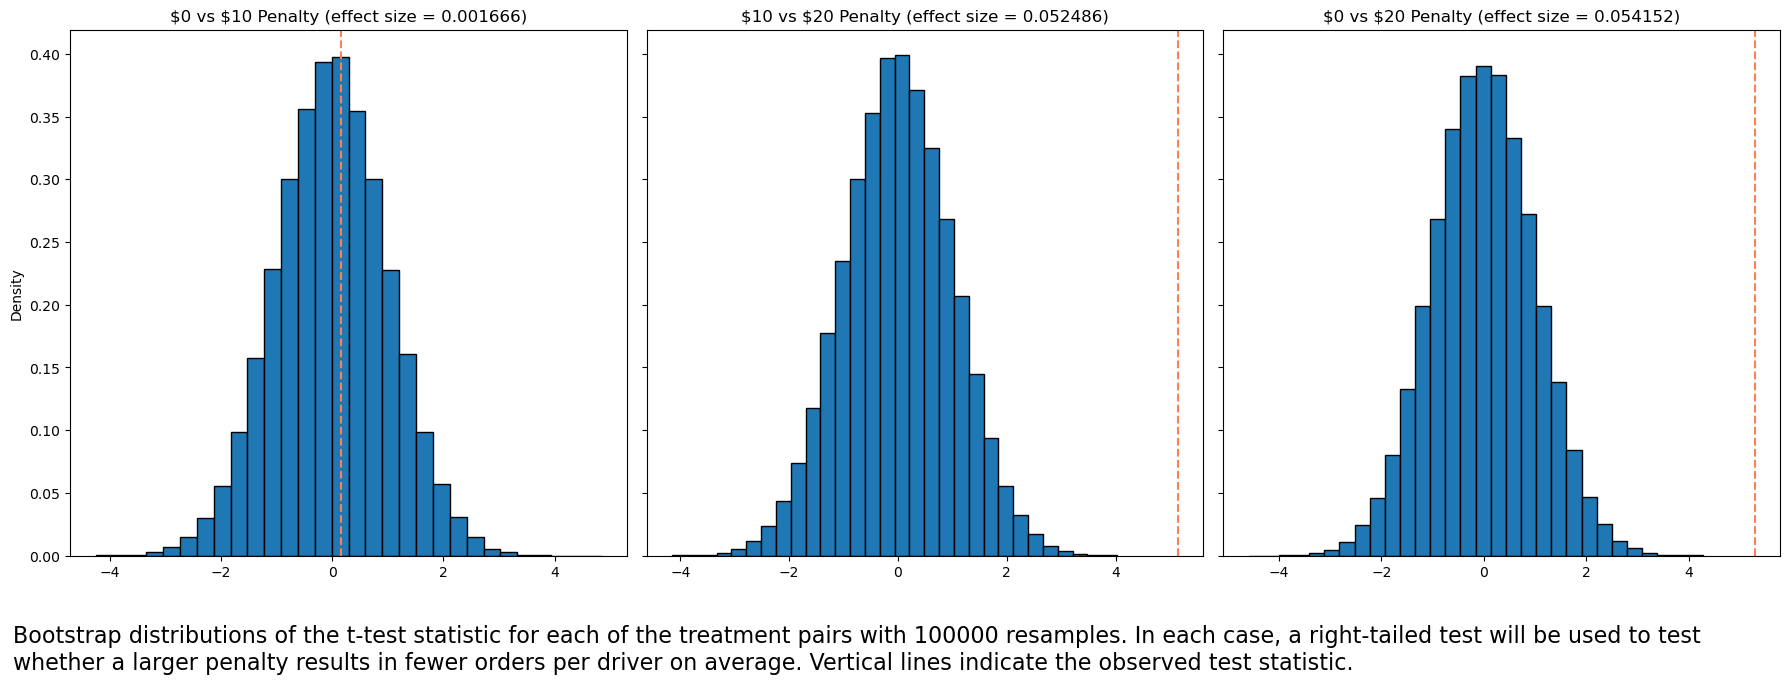

In [ ]:
from math import sqrt
# perform bootstrap welchs t tests instead
# This cell executes in ~2-3 minutes on my pc
def getResampleStatisticsElementwise(_, pseudo_pop):
    ''' 
    Compute a bootstrap sample then return the bootstrap sample mean and standard error
    '''
    resample = np.random.choice(pseudo_pop, size=len(pseudo_pop), replace=True)
    return np.mean(resample), np.std(resample)

getResampleStatistics = np.vectorize(getResampleStatisticsElementwise, excluded=(1,))

def bootstrapTTestElementwise(x_boot_bar1, x_boot_bar2, std_boot1, std_boot2, x_bar1, x_bar2, n1, n2):
    '''
    Compute one bootstrap t-test statistic
    Args:
        x_boot_bar1 (float): Sample mean of the first bootstrap sample
        x_boot_bar2 (float): Sample mean of the second bootstrap sample
        std_boot1 (float): Standard Error of the first bootstrap sample
        std_boot2 (float): Standard Error of the second bootstrap sample
        x_bar1 (float): Sample mean of the first pseudopopulation
        x_bar2 (float): Sample mean of the second pseudopopulation
        n1 (int): Size of the first pseudopopulation
        n2 (int): Size of the second pseudopopulation
    Returns:
        t-test statistic: A positive value means the first bootstrap sample mean is greater than the second
    ''' 
    t_stat = x_boot_bar1 - x_boot_bar2 - (x_bar1 - x_bar2)
    t_stat /= sqrt((std_boot1**2/n1) + (std_boot2**2/n2))
    return t_stat

bootstrapTTest = np.vectorize(bootstrapTTestElementwise, excluded=(4,5,6,7))

FDR = 0.05
p_vals = np.array([np.nan, np.nan, np.nan])
test_names = np.array(['cnt_0 <= cnt 10', 'cnt_10 <= cnt_20', 'cnt_0 <= cnt_20'])
test_pairs = ((cnts_0, cnts_10), (cnts_10, cnts_20), (cnts_0, cnts_20))

# get bootstrap sample statistics without storing all bootstrap samples at once
resample_size = 100000
x_boot_bars = {key:np.empty(shape=resample_size) for key in (0, 10, 20)}
x_boot_stds = {key:np.empty(shape=resample_size) for key in (0, 10, 20)}
for k, sample in ((0, cnts_0), (10, cnts_10), (20, cnts_20)):
    resample_statistics = getResampleStatistics(np.empty(shape=resample_size), sample)
    x_boot_bars[k] = resample_statistics[0]
    x_boot_stds[k] = resample_statistics[1]

# compute t_boots for each treatement pair and plot t_boot distributions
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(18,6))
t_boots = [np.empty(shape=resample_size) for _ in range(len(test_pairs))]
boot_p_vals = np.empty(shape=len(test_pairs)) # 95% lower confidence bound
for i, pair in enumerate(((0,10),(10,20),(0,20))):
    ttest_actual = stats.ttest_ind(test_pairs[i][0], test_pairs[i][1], equal_var=False, alternative='greater')
    x_bars = [np.mean(test_pairs[i][0]), np.mean(test_pairs[i][1])] #pseudopopulation means
    t_boots[i] = bootstrapTTest(x_boot_bars[pair[0]], x_boot_bars[pair[1]], x_boot_stds[pair[0]], x_boot_stds[pair[1]], x_bars[0], x_bars[1], len(test_pairs[i][0]), len(test_pairs[i][1]))
    # ASL = count differences at least as large as actual for one sided test with conservative correction that there is at least one sample (the original) as extreme
    boot_p_vals[i] = (np.sum(t_boots[i] > ttest_actual.statistic) + 1) / (resample_size + 1)
    # plot
    axs[i].hist(t_boots[i], bins=30, edgecolor='black', density=True)
    axs[i].set_title(f'\\${pair[0]} vs \\${pair[1]} Penalty (effect size = {x_bars[0] - x_bars[1]:.6f})')
    axs[i].axvline(x=ttest_actual.statistic, color='coral', linestyle='--')

# Benjamini-Hochberg procedure
sort_index = np.argsort(boot_p_vals)
boot_p_vals = boot_p_vals[sort_index]
test_names = test_names[sort_index]
cutoff_index = max([j for j in range(3) if boot_p_vals[j] < (j/3)*FDR] + [-1])
for i, test_name in enumerate(test_names):
    if i <= cutoff_index:
        print(f'Rejected null hypothesis {i+1} ({test_name}) with ASL={boot_p_vals[i]}   Effect size: {np.mean(test_pairs[i][0]) - np.mean(test_pairs[i][1])}')
    else:
        print(f'Failed to reject null hypothesis {i+1} ({test_name}) with ASL={boot_p_vals[i]} (effect size = {np.mean(test_pairs[i][0]) - np.mean(test_pairs[i][1])})')

caption = f'Bootstrap distributions of the t-test statistic for each of the treatment pairs with {resample_size} resamples. In each case, a right-tailed test will be used to test whether a larger penalty results in fewer orders per driver on average. Vertical lines indicate the observed test statistic.'
fig.text(0.01, -0.05, caption, ha='left', va='top', wrap=True, fontsize=16)
plt.subplots_adjust(bottom=0.2)
axs[0].set_ylabel('Density')
plt.show()

### Compare correlation between week and orders per driver across treatments